# Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the citipy Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# produzable to not bring different cities at least after five time
np.random.seed(1234)

# Create a set of random lat and lng combinations
#Pull 1500 random samples of lat and long
#uniform means that each value has probability to be picked
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the cities and the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 590
['adamstown', 'jinghong', 'taulaga', 'bethel', 'gaspe', 'constantia', 'tsiombe', 'berezovyy', 'iskateley', 'port mathurin', 'abepura', 'nagqu', 'shelbyville', 'jamestown', 'taiohae', 'garissa', 'port-aux-francais', 'kodiak', 'isafjordur', 'walvis bay', 'zhanjiang', 'waitangi', 'hammerfest', 'idri', 'ripky', 'margaret river', 'mejit', 'ta`u', 'schonkirchen', 'port alfred', "la'ie", 'gilgit', 'yellowknife', 'west island', 'olonkinbyen', 'ushuaia', 'grytviken', 'san felipe', 'guerrero negro', 'akropong', 'crane', 'san jose de feliciano', 'san antonio de pale', 'edinburgh of the seven seas', 'saint-francois', 'coahuayana de hidalgo', 'puerto natales', 'al jawf', 'saudarkrokur', 'shimanovsk', 'ust-nera', 'tiksi', 'klyuchi', 'pandaria', 'kindu', 'port elizabeth', 'uturoa', 'albany', 'yuzhno-kurilsk', 'markapur', 'east london', 'ilulissat', 'flying fish cove', 'mata-utu', 'saipan', 'haiku-pauwela', 'yamada', 'nayoro', 'la ronge', 'stanley', 'puerto san carlos

In [11]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather"&appid={api_key}&units=metric"
url = "http://api.openweathermap.org/data/2.5/weather" + "?appid=" + weather_api_key + "&units=metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# enumerate will produce the index number for each city
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
  
    city_url = url +"&q="+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | jinghong
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | gaspe
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | tsiombe
Processing Record 8 of Set 1 | berezovyy
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | abepura
Processing Record 12 of Set 1 | nagqu
Processing Record 13 of Set 1 | shelbyville
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | garissa
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | zhanjiang
Processing Record 22 of Set 1 | waitangi
Proces

In [13]:

# Create DataFrame from the city_data list
city_data_df = pd.DataFrame(city_data)
# Display the first few rows of the DataFrame
print(city_data_df.count())  # This will show the number of non-null entries per column


City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64


In [13]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.98,68,100,0.86,PN,1731341489
1,jinghong,21.9910,100.7341,18.90,96,12,1.39,CN,1731341490
2,taulaga,-11.0553,-171.0883,28.35,69,89,7.44,AS,1731341492
3,bethel,41.3712,-73.4140,18.67,65,40,4.12,US,1731341388
4,gaspe,48.8334,-64.4819,5.12,87,100,4.12,CA,1731341494


In [15]:
#save the data in the cities.csv
city_data_df.to_csv("cities.csv", index_label = "City_ID")

In [17]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.48,72,76,3.82,PN,1731432688
1,jinghong,21.9910,100.7341,17.81,97,0,1.41,CN,1731432689
2,taulaga,-11.0553,-171.0883,28.17,71,96,6.27,AS,1731432690
3,bethel,41.3712,-73.4140,11.05,51,40,6.17,US,1731432692
4,gaspe,48.8334,-64.4819,3.12,81,75,4.63,CA,1731432542


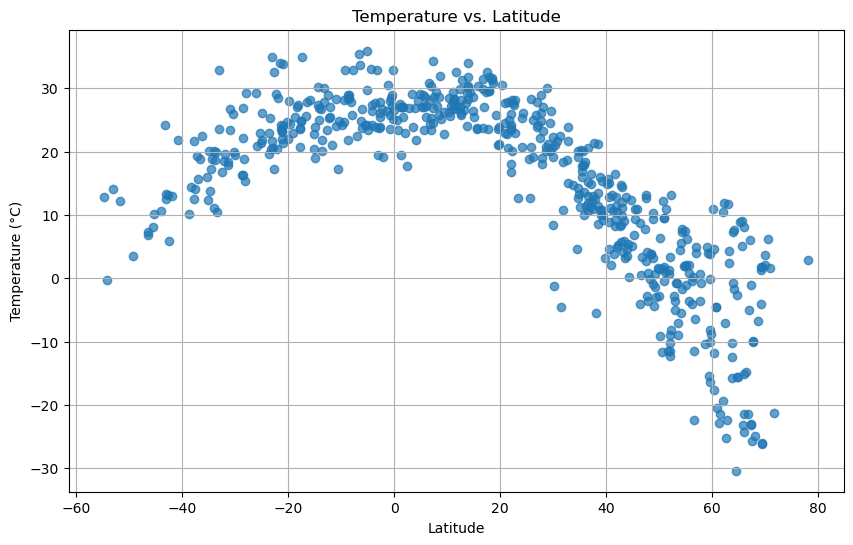

In [42]:
# Plot Temperature vs. Latitude
plt.figure(figsize=(10, 6))
# scatter graphic
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.7)
# title
plt.title("Temperature vs. Latitude")
# latitude label
plt.xlabel("Latitude")
#temperature label
plt.ylabel("Temperature (°C)")
plt.grid(True)
# saving the figure
plt.savefig("output_data/Fig1.png")
# displaying fig
plt.show()

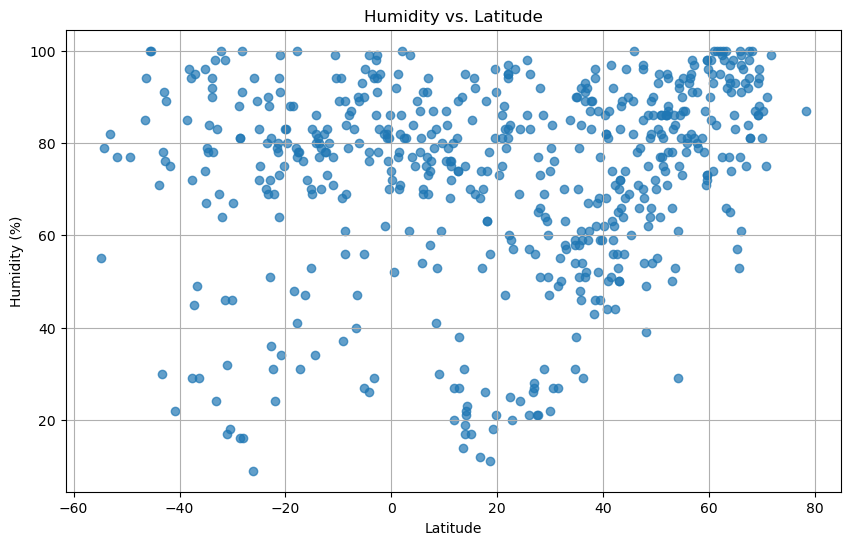

In [19]:
# Plot Humidity vs. Latitude
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.7)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()

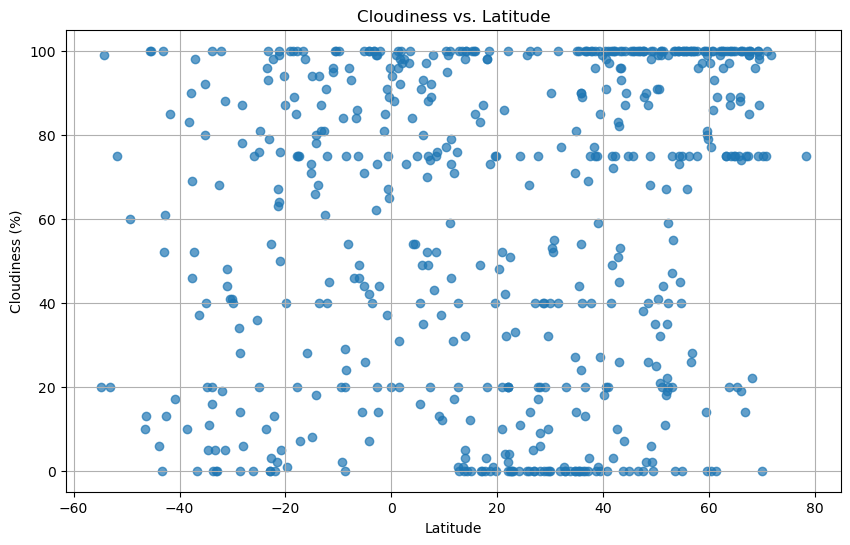

In [21]:
# Plot Cloudiness vs. Latitude
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.7)
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()


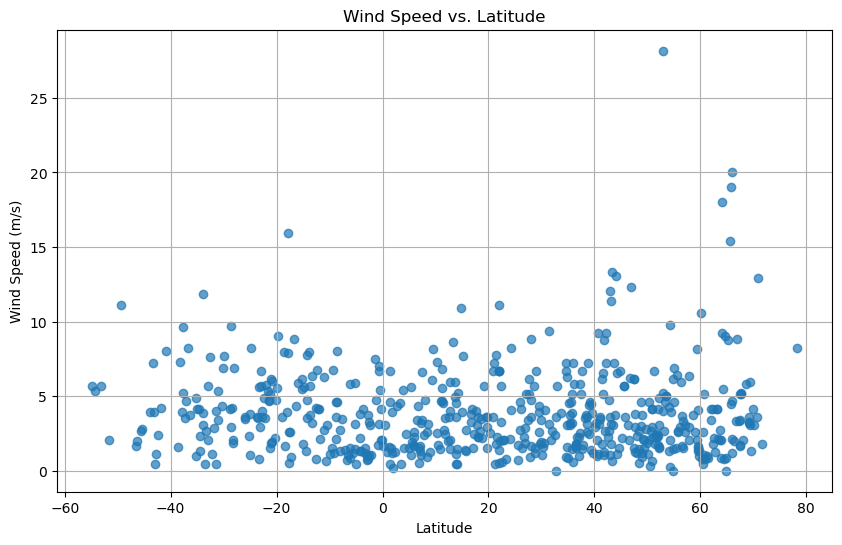

In [23]:
# Plot Wind Speed vs. Latitude
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.7)
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [ ]:
# creating a function
def plot_linear_regression_scipy(X, y, title, text_coordinates):
    # Calculate the linear regression using scipy.stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
    # Calculate predicted y values based on the linear model
    y_pred = intercept + slope * X
    
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Data points')
    
    # Plot the regression line
    plt.plot(X, y_pred, color='red', label=f'Regression line (slope={slope:.2f}, intercept={intercept:.2f})')
    
    # Adding labels and title
    plt.xlabel('X values')
    plt.ylabel('y values')
    plt.title('Linear Regression Plot (using scipy.stats)')
    plt.legend()
    plt.show()
    
    # displaying the regression statistics
    print(f"Slope: {slope:.2f}")
    print(f"Intercept: {intercept:.2f}")
    print(f"R-squared: {r_value**2:.2f}")
    print(f"P-value: {p_value:.2e}")
    print(f"Standard error: {std_err:.2f}")

plot_linear_regression_scipy(X, y)

In [27]:
# Create Northern Hemisphere data (Latitude >= 0)
df_northern_hemi = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

df_northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jinghong,21.9910,100.7341,17.81,97,0,1.41,CN,1731432689
3,bethel,41.3712,-73.4140,11.05,51,40,6.17,US,1731432692
4,gaspe,48.8334,-64.4819,3.12,81,75,4.63,CA,1731432542
5,constantia,44.1833,28.6500,5.38,74,87,6.53,RO,1731432582
7,berezovyy,51.6667,135.7000,-11.63,74,11,2.39,RU,1731432697


In [29]:
# Southern Hemisphere data (Latitude < 0)
df_southern_hemi = city_data_df.loc[(city_data_df["Lat"] < 0),:]

df_southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.48,72,76,3.82,PN,1731432688
2,taulaga,-11.0553,-171.0883,28.17,71,96,6.27,AS,1731432690
6,tsiombe,-25.3000,45.4833,22.46,89,36,2.36,MG,1731432695
9,port mathurin,-19.6833,63.4167,24.42,80,1,9.04,MU,1731432593
10,abepura,-2.6333,140.5833,25.45,94,20,1.03,ID,1731432700


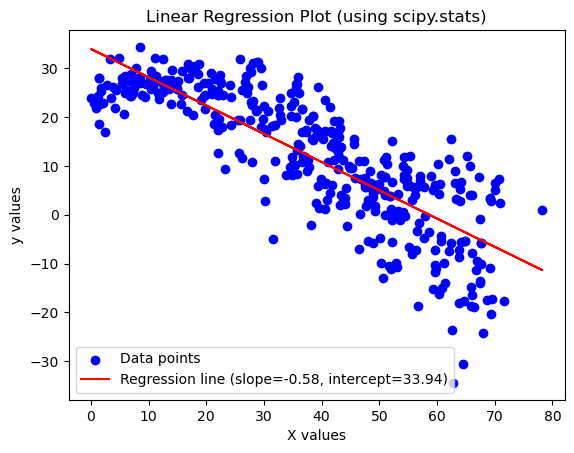

Slope: -0.58
Intercept: 33.94
R-squared: 0.69
P-value: 1.21e-103
Standard error: 0.02


In [42]:
# Linear regression on Northern Hemisphere
X = df_northern_hemi["Lat"]
Y = df_northern_hemi["Max Temp"]
plot_linear_regression_scipy(X,Y, "Max Temp", (6,-10))

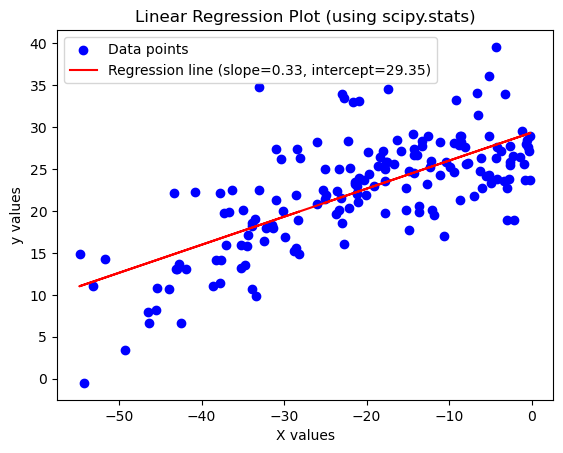

Slope: 0.33
Intercept: 29.35
R-squared: 0.50
P-value: 4.90e-27
Standard error: 0.03


In [31]:
# Linear regression on Southern Hemisphere
X = df_southern_hemi["Lat"]
Y = df_southern_hemi["Max Temp"]
plot_linear_regression_scipy(X, Y, "Max Temp", (-55, 35))

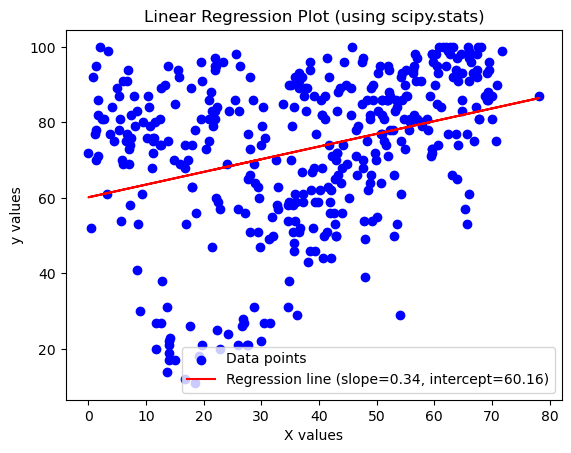

Slope: 0.34
Intercept: 60.16
R-squared: 0.10
P-value: 6.27e-11
Standard error: 0.05


In [33]:
# Northern Hemisphere
X = df_northern_hemi["Lat"]
Y = df_northern_hemi["Humidity"]
plot_linear_regression_scipy(X, Y, "Humidity",(40,10))

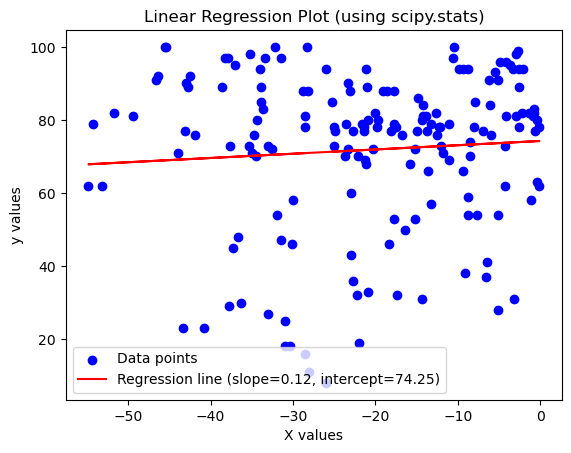

Slope: 0.12
Intercept: 74.25
R-squared: 0.01
P-value: 3.36e-01
Standard error: 0.12


In [64]:
# Southern Hemisphere
X = df_southern_hemi["Lat"]
Y = df_southern_hemi["Humidity"]
plot_linear_regression_scipy(X, Y, "Humidity", (-50, 20))

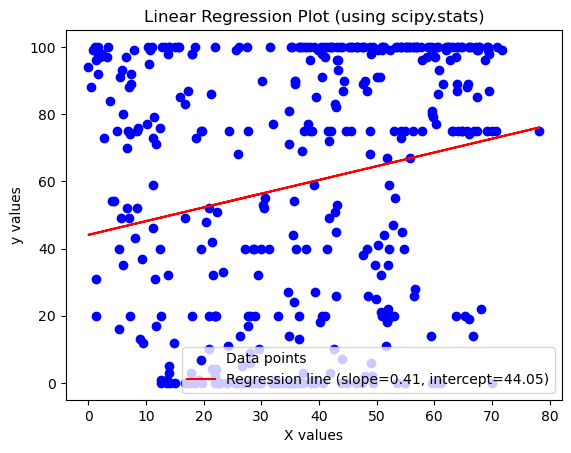

Slope: 0.41
Intercept: 44.05
R-squared: 0.04
P-value: 2.30e-05
Standard error: 0.10


In [35]:
# Northern Hemisphere
X = df_northern_hemi["Lat"]
Y = df_northern_hemi["Cloudiness"]
plot_linear_regression_scipy(X, Y, "Cloudiness", (40,10))

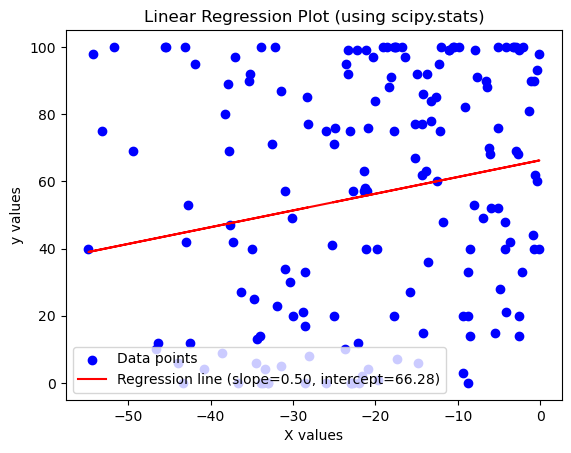

Slope: 0.50
Intercept: 66.28
R-squared: 0.04
P-value: 1.16e-02
Standard error: 0.20


In [70]:
# Southern Hemisphere
X= df_southern_hemi["Lat"]
Y = df_southern_hemi["Cloudiness"]
plot_linear_regression_scipy(X, Y, "Cloudiness", (-30,30))

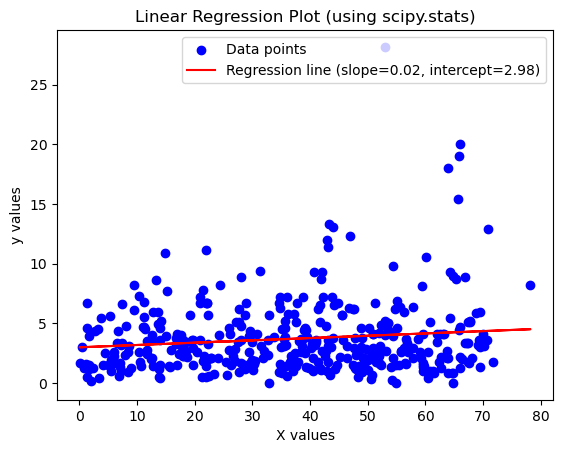

Slope: 0.02
Intercept: 2.98
R-squared: 0.02
P-value: 1.34e-02
Standard error: 0.01


In [37]:
# Northern Hemisphere
X = df_northern_hemi["Lat"]
Y = df_northern_hemi["Wind Speed"]
plot_linear_regression_scipy(X, Y, "Wind Speed", (10,12))

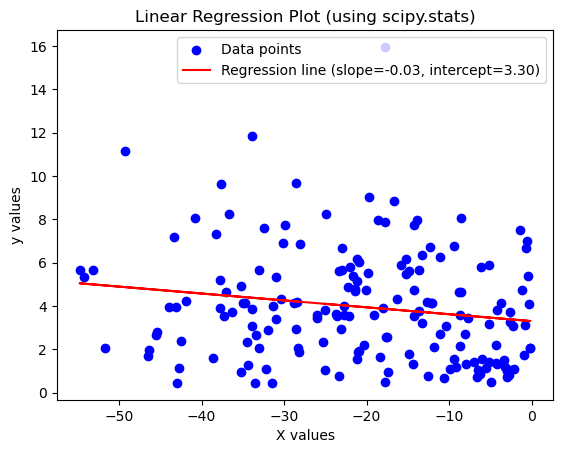

Slope: -0.03
Intercept: 3.30
R-squared: 0.03
P-value: 2.50e-02
Standard error: 0.01


In [41]:
# Southern Hemisphere
X = df_southern_hemi["Lat"]
Y = df_southern_hemi["Wind Speed"]
plot_linear_regression_scipy(X, Y, "Wind Speed", (-50, 12))